# Satış analizi

Elimizde her ayın satış verileri var. Bu verileri gerekli yöntemler kullanarak analiz etmeye çalışacağız.

In [1]:
import pandas as pd
import os

### Her ayın verilerini tek bir CSV dosyasında birleştiriyoruz


In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir("./Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+ file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.to_csv("all_data.csv",index = False)

#all_data.csv adında bir CSV dosyası oluşturduk, şimdi onun üzerinden verileri okuyacağız.

### Oluşturulan yeni veri setini okuyoruz

In [3]:
df = pd.read_csv("./all_data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Veri setini temizliyoruz

#### Öncelikle NaN olan satırları temizliyoruz

In [4]:
df.dropna(thresh = 3, inplace = True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Veri setlerini birleştirdiğimiz için diğer veri setlerinin başlıkları duruyor, onları temizliyoruz

In [5]:
df["Month"] = df["Order Date"].str[0:2] #ay kolonu eklendikten sonra fark edildiği bu yöntem kullanıldı
temp_df = df[df["Month"].str[0:2] == "Or"]

temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [6]:
empty_list= []
for index in temp_df.index:
    empty_list.append(index)

df.drop(empty_list, inplace = True)

#veri setimizi başarıyla temizledik. 

### İşimizi kolaylaştırmak için bazı kolonlar ekliyoruz

#### Ay kolonu

In [7]:
df["Month"] = df["Order Date"].str[0:2]
df["Month"] = df["Month"].astype("int32")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Satış kolonu

In [8]:
df["Quantity Ordered"] = df["Quantity Ordered"].astype("int32")
df["Price Each"] = df["Price Each"].astype("float64")

df["Sales"] = df["Quantity Ordered"] * df["Price Each"]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Şehir kolonu

In [9]:
df["City"] = df["Purchase Address"].apply(lambda x: x.split(",")[1])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


###### Verimiz hazır, artık sorularımızı cevaplayabiliriz

# Soru 1: En çok satış hangi ayda yapıldı? O ayda ne kadar kazanç sağlandı?

In [10]:
df.groupby("Month").sum()["Sales"]

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

In [14]:
print("En çok satış yapılan ay", df.groupby("Month").sum()["Sales"][12],"$ ile Aralık ayıdır.")

En çok satış yapılan ay 4613443.34 $ ile Aralık ayıdır.


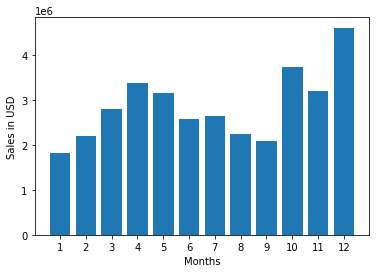

In [15]:
import matplotlib.pyplot as plt

months = range(1,13)
results = df.groupby("Month").sum()

plt.bar(months,results["Sales"])
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales in USD")
plt.show()

Yılın son aylarında satışların arttığı açıkça görülüyor. Reklam harcamalarının yılın son çeyreğinde artırılması mantıklı bir seçim gibi görünüyor.

## Soru 2: Hangi şehir en çok ürün sattı?

In [16]:
df.groupby("City").sum()["Sales"]

City
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: Sales, dtype: float64

In [18]:
df.groupby("City").sum()["Sales"].max()

8262203.91

En çok ürün San Francisco'da satıldı.

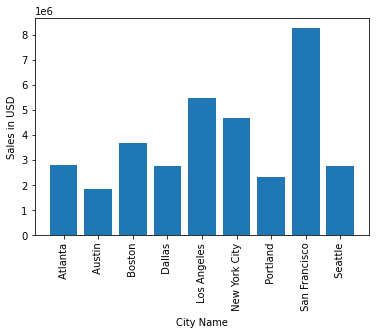

In [19]:
cities = [city for city, df1 in df.groupby("City")]
results = df.groupby("City").sum()

plt.bar(cities,results["Sales"])
plt.xticks(cities,rotation = "vertical")
plt.xlabel("City Name")
plt.ylabel("Sales in USD")
plt.show()

## Soru3: Müşterinin ürünü satın alma olasılığını en üst düzeye çıkarmak için reklamları ne zaman göstermeliyiz?

In [24]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [25]:
#Saat ve dakika kolonlarını ekliyoruz
df["Hour"] = df["Order Date"].dt.hour
df["Minute"] = df["Order Date"].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27


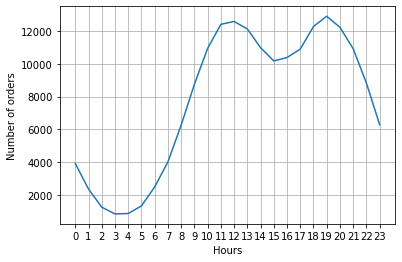

In [29]:
hours = [hour for hour, df1 in df.groupby("Hour")]

plt.plot(hours, df.groupby(["Hour"]).count()["Order ID"])
plt.xticks(hours)
plt.grid()
plt.xlabel("Hours")
plt.ylabel("Number of orders")
plt.show()


Benim tavsiyem sabah 11 veya akşam 7'den biraz önce reklam gösterilmesi en uygun olduğu yönünde.

## Soru 4: En çok hangi ürünler birlikte satılır?


In [34]:
# Tek seferde birden fazla yapılan siparişleri buluyoruz
new_df = df[df["Order ID"].duplicated(keep = False)]

new_df["Grouped"] = new_df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x) )

new_df = new_df[["Order ID","Grouped"]].drop_duplicates()

new_df.head()

C:\Users\casper\AppData\Local\Temp\ipykernel_11948\3315517430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Grouped"] = new_df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x) )


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [35]:
#En çok beraber satılan ürünleri buluyoruz
from itertools import combinations
from collections import Counter

count = Counter()

for row in new_df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Bu veri yapılacak kampanyaları belirlemekte önemli bir gösterge olabilir.

## En çok satılan ürün hangisidir?

In [36]:
df.groupby("Product").sum()["Quantity Ordered"]

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

In [37]:
df.groupby("Product").sum()["Quantity Ordered"].max()

31017

En çok satılan ürün AAA Batteries (4-pack)'dir.

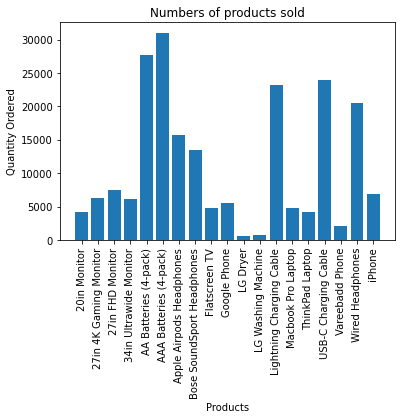

In [38]:
products = [product for product, dfx in df.groupby("Product")]
quantity_ordered = df.groupby("Product").sum()["Quantity Ordered"]

plt.bar(products,quantity_ordered)
plt.ylabel("Quantity Ordered")
plt.xlabel("Products")
plt.title("Numbers of products sold")
plt.xticks(rotation = "vertical" )
plt.show()

Her üründen ne kadar satıldığını bu grafik yardımıyla görebiliriz.

C:\Users\casper\AppData\Local\Temp\ipykernel_11948\2075275670.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)
C:\Users\casper\AppData\Local\Temp\ipykernel_11948\2075275670.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


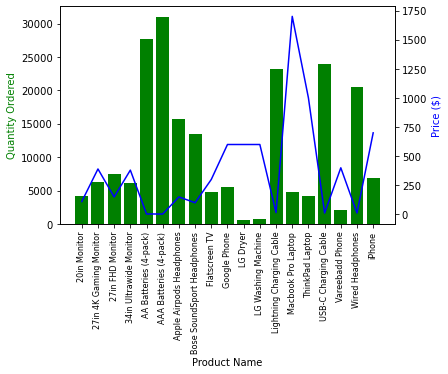

In [39]:
prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()

Her üründen ne kadar satıldığını ortalama fiyatla beraber görüyoruz. 